In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/KARAN K S/Downloads/Dataset/Train'
valid_path = 'C:/Users/KARAN K S/Downloads/Dataset/Test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('C:/Users/KARAN K S/Downloads/Dataset/Train/*')

In [6]:
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('C:/Users/KARAN K S/Downloads/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('C:/Users/KARAN K S/Downloads/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [14]:
r = model.fit_generator(training_set,validation_data=test_set,
                        epochs=25,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\KARAN K S\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
13/13 [==============================] - 21s 1s/step - loss: 2.0131 - accuracy: 0.5566 - val_loss: 0.8268 - val_accuracy: 0.3433
Epoch 2/25
13/13 [==============================] - 11s 809ms/step - loss: 0.6976 - accuracy: 0.5098 - val_loss: 0.7830 - val_accuracy: 0.3433
Epoch 3/25
13/13 [==============================] - 10s 780ms/step - loss: 0.6033 - accuracy: 0.6565 - val_loss: 1.0346 - val_accuracy: 0.3358
Epoch 4/25
13/13 [==============================] - 10s 738ms/step - loss: 0.5333 - accuracy: 0.7336 - val_loss: 1.1031 - val_accuracy: 0.3284
Epoch 5/25
13/13 [==============================] - 10s 736ms/step - loss: 0.5852 - accuracy: 0.6925 - val_loss: 0.7369 - val_accuracy: 0.4403
Epoch 6/25
13/13 [==============================] - 10s 735ms/step - loss: 0.5051 - accuracy: 0.7933 - val_loss: 1.0253 - val_accuracy: 0.3433
Epoch 7/25
13/13 [==============================] - 10s 739ms/step - loss: 0.4443 - accuracy: 0.7995 - val_loss: 1.2995 - val_accuracy: 0.3433
Ep

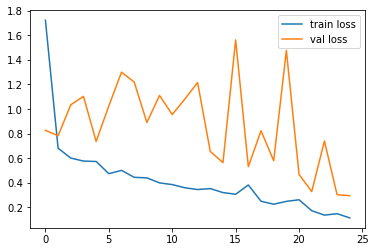

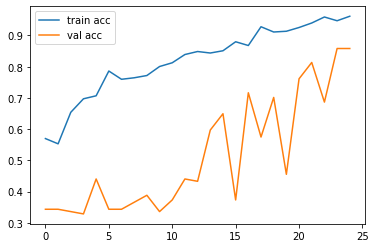

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
from tensorflow.keras.models import load_model
model.save('model.h5')

In [17]:
y_pred = model.predict(test_set)
y_pred

array([[3.5293318e-02, 9.6470672e-01],
       [9.6475714e-01, 3.5242833e-02],
       [7.2401905e-01, 2.7598095e-01],
       [3.3120814e-01, 6.6879183e-01],
       [5.0805813e-01, 4.9194184e-01],
       [1.2797262e-01, 8.7202740e-01],
       [6.8730742e-02, 9.3126923e-01],
       [9.9995244e-01, 4.7542482e-05],
       [5.5696428e-02, 9.4430351e-01],
       [1.5237410e-01, 8.4762591e-01],
       [1.8022819e-01, 8.1977183e-01],
       [9.9969220e-01, 3.0786957e-04],
       [9.8759896e-01, 1.2401112e-02],
       [7.7511445e-02, 9.2248851e-01],
       [5.2349336e-02, 9.4765061e-01],
       [7.6064801e-01, 2.3935197e-01],
       [9.1268355e-01, 8.7316424e-02],
       [5.2611809e-02, 9.4738817e-01],
       [1.8489924e-01, 8.1510079e-01],
       [2.6942489e-01, 7.3057508e-01],
       [9.7793168e-01, 2.2068271e-02],
       [5.6175269e-02, 9.4382465e-01],
       [1.3563713e-01, 8.6436290e-01],
       [2.9141130e-02, 9.7085887e-01],
       [1.2078383e-01, 8.7921619e-01],
       [9.9993205e-01, 6.

In [18]:
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0], dtype=int64)

In [20]:
model=load_model('model.h5')

In [21]:
img=image.load_img('C:/Users/KARAN K S/Downloads/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',
                   target_size=(224,224))

In [22]:
xz=image.img_to_array(img)
xz

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [23]:
xz.shape

(224, 224, 3)

In [24]:
xz=xz/255

In [25]:
xz=np.expand_dims(xz,axis=0)
img_data=preprocess_input(xz)
img_data.shape

(1, 224, 224, 3)

In [26]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [27]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
if(a==0):
    print("Uninfected")
else:
    print("Infected")

Infected
